## Image Manipulation 

Sepia kernel taken from: 
https://www.geeksforgeeks.org/image-processing-in-java-colored-image-to-sepia-image-conversion/#
Blur kernel taken from:
https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [1]:
#import necessary modules
from PIL import Image, ImageOps

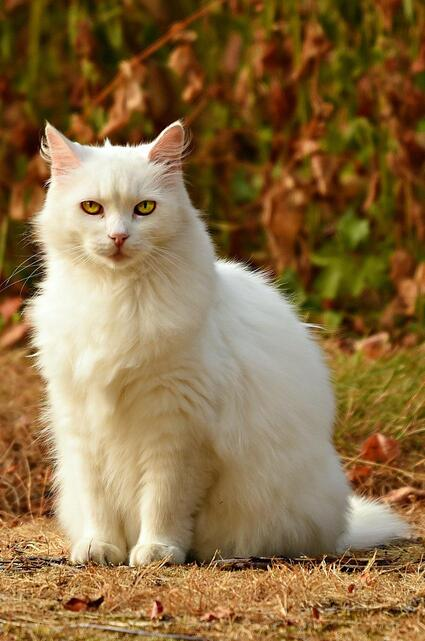

In [2]:
img = Image.open("img_50.jpg")
img

In [3]:
def sepia(image, level=0.8):
    # define sepia kernel
    kernel = [
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ]

    # create a copy of the input image
    output = image.copy()

    # get the width and height of the image
    width, height = output.size

    # loop over every pixel in the image
    for x in range(1, width - 1):
        for y in range(1, height - 1):

            # initialize RGB values for convolution
            conv_r, conv_g, conv_b = 0, 0, 0

            # loop over surrounding pixels for convolution
            for i in range(3):
                for j in range(3):

                    # get the RGB values for the surrounding pixel
                    pixel = image.getpixel((x + i - 1, y + j - 1))

                    # apply the kernel weights to the pixel RGB values
                    conv_r += (pixel[0] * 0.44) * kernel[i][j]
                    conv_g += (pixel[1] * 0.26) * kernel[i][j]
                    conv_b += (pixel[2] * 0.08) * kernel[i][j]

            # adjust sepia level for each color channel
            conv_r *= level
            conv_g *= level
            conv_b *= level

            # clamp values to [0, 255] range
            conv_r = max(0, min(conv_r, 255))
            conv_g = max(0, min(conv_g, 255))
            conv_b = max(0, min(conv_b, 255))

            # set the output pixel value for the current pixel
            output.putpixel((x, y), (int(conv_r), int(conv_g), int(conv_b)))

    # return the resulting sepia grayscale image
    return output.convert('RGB')

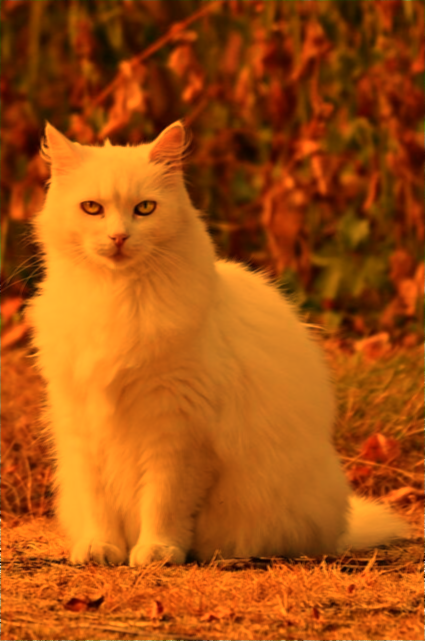

In [4]:
img = sepia(img)
img

In [5]:
def noise(image):
    # define noise kernel
    kernel = [
        [0, 1/8, 0],
        [1/8, 3/4, 1/8],
        [0, 1/8, 0]
    ]

    # create a copy of the input image
    output = image.copy()

    # get the width and height of the image
    width, height = output.size

    # loop over every pixel in the image
    for x in range(1, width - 1):
        for y in range(1, height - 1):

            # initialize RGB values for convolution
            conv_r, conv_g, conv_b = 0, 0, 0

            # loop over surrounding pixels for convolution
            for i in range(3):
                for j in range(3):

                    # get the RGB values for the surrounding pixel
                    pixel = image.getpixel((x + i - 1, y + j - 1))

                    # apply the kernel weights to the pixel RGB values
                    conv_r += pixel[0] * kernel[i][j]
                    conv_g += pixel[1] * kernel[i][j]
                    conv_b += pixel[2] * kernel[i][j]

            # clamp values to [0, 255] range for each color channel
            conv_r = max(0, min(conv_r, 255))
            conv_g = max(0, min(conv_g, 255))
            conv_b = max(0, min(conv_b, 255))

            # set the output pixel value for the current pixel
            output.putpixel((x, y), (int(conv_r), int(conv_g), int(conv_b)))

    # return the resulting noisy grayscale image
    return output.convert('RGB')


In [ ]:
img = noise(img)
img

In [ ]:
def blur(image, radius):
    # Define blur kernel
    kernel = [
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ]

    # Create a copy of the input image
    output = image.copy()
    # Get the width and height of the image
    width, height = output.size

    # Loop through each pixel in the image, skipping the edge pixels
    for x in range(radius, width - radius):
        for y in range(radius, height - radius):
            r_conv, g_conv, b_conv = 0, 0, 0
            # Apply the blur kernel to the current pixel and its neighbors
            for i in range(3):
                for j in range(3):
                    r, g, b = image.getpixel((x + i - radius, y + j - radius))
                    r_conv += r * kernel[i][j]
                    g_conv += g * kernel[i][j]
                    b_conv += b * kernel[i][j]

            # Round the calculated color values to the nearest integer
            r_conv = int(round(r_conv))
            g_conv = int(round(g_conv))
            b_conv = int(round(b_conv))
            # Set the color of the output image pixel to the calculated color values
            output.putpixel((x, y), (r_conv, g_conv, b_conv))

    # Convert the output image to the RGB color space and return it
    return output

In [ ]:
img = blur(img,1)
img